<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB_09_2403a52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

# Used to load pre-trained Word2Vec model
import gensim
from gensim.models import KeyedVectors

# Used for numerical operations and cosine similarity
import numpy as np

# Used for visualization (optional step)
import matplotlib.pyplot as plt

# Used for dimensionality reduction
from sklearn.decomposition import PCA


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 58.2 MB/s eta 0:00:00


In [ ]:
# STEP 3: Load Pre-trained Embeddings from CSV file

import pandas as pd
import numpy as np

# Load the dataset
file_path = "word_embeddings_ready_dataset.csv"
df = pd.read_csv(file_path)

# Display first 5 rows to understand structure
print("First 5 rows of dataset:")
print(df.head())

# Vocabulary size = total number of words
vocab_size = len(df)
print("\nVocabulary Size:", vocab_size)

# Number of dimensions (excluding 'word' column)
embedding_dim = df.shape[1] - 1
print("Embedding Dimension:", embedding_dim)

# Convert dataframe into dictionary:
# key = word
# value = numpy vector
embeddings = {}

for index, row in df.iterrows():
    word = row['word']
    vector = row[1:].values.astype(float)  # Skip word column
    embeddings[word] = vector

# Display vector for sample word
print("\nVector for 'king':")
print(embeddings['king'])


First 5 rows of dataset:
     word     dim_1     dim_2     dim_3     dim_4     dim_5     dim_6  \
0    king  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137   
1   queen  0.324084 -0.385082 -0.676922  0.611676  1.031000  0.931280   
2     man -1.415371 -0.420645 -0.342715 -0.802277 -0.161286  0.404051   
3   woman  0.250493  0.346448 -0.680025  0.232254  0.293072 -0.714351   
4  doctor  0.357787  0.560785  1.083051  1.053802 -1.377669 -0.937825   

      dim_7     dim_8     dim_9  ...    dim_41    dim_42    dim_43    dim_44  \
0  1.579213  0.767435 -0.469474  ...  0.738467  0.171368 -0.115648 -0.301104   
1 -0.839218 -0.309212  0.331263  ...  0.097078  0.968645 -0.702053 -0.327662   
2  1.886186  0.174578  0.257550  ...  0.227460  1.307143 -1.607483  0.184634   
3  1.865775  0.473833 -1.191303  ... -0.446515  0.856399  0.214094 -1.245739   
4  0.515035  0.513786  0.515048  ... -0.792521 -0.114736  0.504987  0.865755   

     dim_45    dim_46    dim_47    dim_48    dim_49    

In [ ]:
# STEP 4: Compute Cosine Similarity

# Function to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)  # A.B
    norm_a = np.linalg.norm(vec1)     # ||A||
    norm_b = np.linalg.norm(vec2)     # ||B||
    return dot_product / (norm_a * norm_b)

# Word pairs to test
word_pairs = [
    ('king', 'queen'),
    ('man', 'woman'),
    ('doctor', 'nurse'),
    ('king', 'man'),
    ('queen', 'woman'),
    ('doctor', 'hospital'),
    ('cat', 'dog'),
    ('apple', 'banana'),
    ('paris', 'france'),
    ('india', 'delhi')
]

print("\nCosine Similarity Results:\n")

for w1, w2 in word_pairs:
    if w1 in embeddings and w2 in embeddings:
        sim = cosine_similarity(embeddings[w1], embeddings[w2])
        print(f"{w1} - {w2} : {sim:.4f}")
    else:
        print(f"{w1} or {w2} not found in vocabulary")



Cosine Similarity Results:

king - queen : 0.1020
man - woman : 0.0502
doctor - nurse : 0.2944
king - man : -0.1127
queen - woman : -0.1699
doctor - hospital : -0.1461
cat - dog : 0.1238
apple or banana not found in vocabulary
paris - france : -0.1665
india - delhi : -0.2085


In [ ]:
# STEP 5: Find Top Similar Words

def most_similar(target_word, top_n=5):
    similarities = {}

    target_vector = embeddings[target_word]

    for word, vector in embeddings.items():
        if word != target_word:
            sim = cosine_similarity(target_vector, vector)
            similarities[word] = sim

    # Sort words by similarity (highest first)
    sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    return sorted_words[:top_n]

# Test for selected words
test_words = ['king', 'doctor', 'woman', 'paris', 'hospital']

for word in test_words:
    if word in embeddings:
        print(f"\nTop similar words to '{word}':")
        similar_words = most_similar(word)

        for sim_word, score in similar_words:
            print(f"{sim_word} : {score:.4f}")



Top similar words to 'king':
doctor : 0.2874
nurse : 0.2248
computer : 0.1085
queen : 0.1020
woman : 0.0810

Top similar words to 'doctor':
bus : 0.3313
nurse : 0.2944
king : 0.2874
delhi : 0.1802
man : 0.1657

Top similar words to 'woman':
cat : 0.3267
france : 0.2417
paris : 0.2285
teacher : 0.2177
college : 0.2071

Top similar words to 'paris':
woman : 0.2285
college : 0.2166
car : 0.2143
university : 0.1722
bus : 0.0894

Top similar words to 'hospital':
university : 0.1382
delhi : 0.1056
paris : 0.0837
computer : 0.0690
queen : 0.0607


In [ ]:
# STEP 6: Word Analogy Function

def analogy(word_a, word_b, word_c):
    """
    Computes: word_a - word_b + word_c
    """
    if word_a in embeddings and word_b in embeddings and word_c in embeddings:

        result_vector = embeddings[word_a] - embeddings[word_b] + embeddings[word_c]

        similarities = {}

        for word, vector in embeddings.items():
            sim = cosine_similarity(result_vector, vector)
            similarities[word] = sim

        # Sort results
        sorted_words = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

        return sorted_words[:5]
    else:
        return "One or more words not found."

# Perform analogies

print("\nking - man + woman =")
print(analogy('king', 'man', 'woman'))

print("\nparis - france + india =")
print(analogy('paris', 'france', 'india'))

print("\nteacher - school + hospital =")
print(analogy('teacher', 'school', 'hospital'))



king - man + woman =
[('king', np.float64(0.6596153442740549)), ('woman', np.float64(0.5311117484425831)), ('computer', np.float64(0.20216560698712313)), ('france', np.float64(0.18286083255097432)), ('paris', np.float64(0.1141908449845386))]

paris - france + india =
[('paris', np.float64(0.6720201371543104)), ('india', np.float64(0.4929875157972665)), ('university', np.float64(0.23938490491446263)), ('car', np.float64(0.2227765273605353)), ('hospital', np.float64(0.16159476373411483))]

teacher - school + hospital =
[('hospital', np.float64(0.6285101915128796)), ('teacher', np.float64(0.4325269950028606)), ('india', np.float64(0.26194670938553183)), ('university', np.float64(0.13964123036926726)), ('paris', np.float64(0.12071271582914905))]


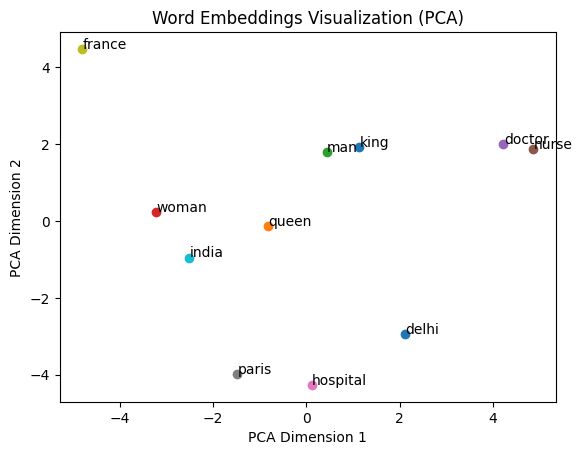

In [ ]:
# STEP 7: Visualize Embeddings using PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select words that exist in dataset
selected_words = ['king','queen','man','woman',
                  'doctor','nurse','hospital',
                  'paris','france','india','delhi']

# Extract vectors
vectors = [embeddings[word] for word in selected_words if word in embeddings]

# Reduce dimensions from 50 → 2
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot
plt.figure()

for i, word in enumerate(selected_words):
    if word in embeddings:
        plt.scatter(reduced_vectors[i,0], reduced_vectors[i,1])
        plt.text(reduced_vectors[i,0]+0.01,
                 reduced_vectors[i,1]+0.01,
                 word)

plt.title("Word Embeddings Visualization (PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()
